# Preprocessing

In this Assignment, we will be exploring how to preprocess tweets for sentiment analysis. 


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
from tqdm import tqdm
import tensorflow as tf

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams.



### What does this mean?

In the NLTK sample dataset you mentioned, there are 5000 positive tweets and 5000 negative tweets. This equal distribution of positive and negative tweets is intentional and serves the purpose of creating a balanced dataset for training and evaluation.

However, it's important to note that this balanced dataset does not accurately reflect the real distribution of positive and negative tweets in live Twitter streams. In real-time, the occurrence of positive and negative tweets can vary significantly based on several factors.

In real-world scenarios, it's common to observe imbalanced distributions of positive and negative tweets. This imbalance presents challenges when training and evaluating machine learning models that have been trained on a balanced dataset. The models may not generalize well to imbalanced distributions and may exhibit biases or limitations when applied to real-time Twitter streams.

To address such challenges, specialized techniques for handling imbalanced data can be employed, such as oversampling the minority class, undersampling the majority class, or using advanced algorithms that handle imbalanced data effectively. Additionally, incorporating contextual information, topic modeling, or sentiment analysis techniques can further improve the understanding and analysis of sentiment in live Twitter streams.

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

This line assigns the variable all_positive_tweets to a list of strings representing the positive tweets from the NLTK Twitter sample dataset. The `twitter_samples.strings()` function is used to retrieve the tweets, and `positive_tweets.json` is passed as the argument to specify the file containing the positive tweets.

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
print(all_negative_tweets[0])

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
hopeless for tmr :(


## Looking at raw texts



Below, you will print one random positive and one random negative tweet. 

In [5]:
print(all_positive_tweets[random.randint(0,5000)])
print()
print(all_negative_tweets[random.randint(0,5000)])

Imran khan a hero :) really  #IKPrideOfPak

@QjQj_Kwon How weird :( ^^


## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming




### Br..eak it down!
Example Sentence: "I love eating pizza! It's delicious."

Tokenizing the String:
Tokenization involves splitting the sentence into individual tokens or words. In this case, the tokenized version of the sentence would be: `["I", "love", "eating", "pizza", "!", "It's", "delicious", "."]`

Lowercasing:
Lowercasing involves converting all the tokens to lowercase. After lowercasing, the tokenized sentence becomes: `["i", "love", "eating", "pizza", "!", "it's", "delicious", "."]`

Removing Stop Words and Punctuation:
Stop words are common words like "I," "it's," and "the" that don't carry significant meaning for analysis. Punctuation marks, such as "!" and ".", are also removed. After removing stop words and punctuation, the tokenized and lowercased sentence becomes: `["love", "eating", "pizza", "delicious"]`

Stemming:
Stemming reduces words to their base or root form. In this case, stemming the sentence using the Porter stemming algorithm would result in: `["love", "eat", "pizza", "delici"]`

So, after applying all the preprocessing steps, the example sentence has been transformed into the following tokens: `["love", "eat", "pizza", "delici"]`.

In [6]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [7]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [9]:
        # remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Bruhtal

#### Firstly let's see `^RT[\s]+`

`^`: The caret symbol at the beginning of the pattern signifies that the match should start at the beginning of the string.

`RT`: This matches the characters "RT" exactly as they appear.

`[\s]+`: The square brackets indicate a character set or class. \s is a shorthand character class that represents whitespace characters, such as spaces, tabs, and newlines. The + quantifier specifies that one or more whitespace characters should be matched.

Putting it all together, `^RT[\s]+` matches a string that starts with the characters "RT" followed by one or more whitespace characters.

Example:
Suppose we have a tweet: "RT @username: This is a sample tweet."

Applying the re.sub() function with the pattern `^RT[\s]+`, we would get the following result:

Original tweet: "RT @username: This is a sample tweet."
Modified tweet: "@username: This is a sample tweet."

#### Let's see `'https?://[^\s\n\r]+'`

`r`: The "r" at the beginning of the pattern indicates that it is a raw string, allowing backslashes to be treated as literal characters instead of escape characters.

`https?://`: This part matches the literal characters "http://" or "https://". The question mark `"?" makes the "s" optional, allowing for both "http://" and "https://" to be matched.`

`[^\s\n\r]+`: This part is a character class that matches any character that is not a whitespace character, newline character, or carriage return character. The caret `"^"` at the beginning of the character class negates the match, so it matches any character not listed. The `"+"` quantifier after the character class matches one or more occurrences of the preceding pattern.

To summarize, the pattern r'https?://[^\s\n\r]+' matches URLs starting with "http://" or "https://" and followed by one or more characters that are not whitespace, newline, or carriage return characters.

Example:
Suppose we have a tweet: "Check out this link: https://example.com"

Applying the regular expression pattern r'https?://[^\s\n\r]+', we would get the following result:

Original tweet: "Check out this link: https://example.com"
Matched URL: "https://example.com"
In this example, the pattern r'https?://[^\s\n\r]+' matches the URL "https://example.com" in the tweet. It captures the entire URL because it starts with "https://" and consists of characters that are not whitespace, newline, or carriage return. This pattern is useful for removing or replacing URLs in text data.

#### And the now easy-peasy `r'#'`

This line removes hashtags from the tweet by replacing the hash sign "#" with an empty string. It removes the hash symbol but retains the word itself.


This code snippet demonstrates how to use regular expressions (re.sub()) in Python to remove specific patterns such as old-style retweet text, hyperlinks, and hashtags from a given tweet. The resulting tweet2 will be a modified version of the original tweet with the specified patterns removed.


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [10]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### B-R-E-A-K-!

`tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)`

This line instantiates the TweetTokenizer class with three parameters:

`preserve_case=False` specifies that the tokenizer should convert all tokens to lowercase.
`strip_handles=True` indicates that user handles (e.g., @username) should be removed from the tokens.
`reduce_len=True` specifies that repeated character sequences of length 3 or more should be reduced to length 3.

More on `reduce_len=True`:

In some informal text, especially in tweets, people often use elongated words with repeated characters to convey emphasis or emotion. For example, "soooo" instead of "so" or "happyyyy" instead of "happy."

Setting reduce_len=True in TweetTokenizer specifies that repeated character sequences of length 3 or more should be reduced to length 3. This feature helps in normalizing such elongated words to their base form by truncating the repeated characters beyond three.


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [11]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. 


Time to clean up our tokenized tweet!

In [12]:

print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled. 

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [13]:

print(tweets_clean)

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [14]:
processed_tweet=' '.join(tweets_stem)
processed_tweet

'beauti sunflow sunni friday morn :) sunflow favourit happi friday …'

That's it! Now we have a sentence which can be feed into to the next stage 
of our  project.

.

PART 2: Sentimental Analysis

In [15]:
import numpy as np
import pandas as pd
nltk.download('twitter_samples')
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [16]:
    #print tweets here
tweets[np.random.randint(0,10001)]

"Since models own stopped stocking at boots I can't get any and I can't even order online because it's telling me it's unsafe :("

In [17]:
y=np.zeros(10000)
for i in range(5000):
  y[i]=1

Now make a function and implement pre-processing into all tweets and then make an array that contains all processed tweets as strings.

In [18]:
def tokeniser(tweet):
    tweet_tokens=[]
    tweet_clean=[]
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = [word for word in tweet_tokens if word not in stopwords_english and word not in string.punctuation]
    

    return tweets_clean
def stemming(tweets_clean):
    stemmer=PorterStemmer()
    tweets_stem=[]
    tweets_stem = [stemmer.stem(word) for word in tweets_clean]
    return ' '.join(tweets_clean)    
def format_tweeets(tweet_list):
    processed_tweets=[]
    with tqdm(total=len(tweet_list), desc="Processing") as pbar:
        for tweet in tweet_list:
            tweet =re.sub(r'^RT[\s]+', '', tweet)
            tweet=re.sub(r'https?://[^\s\n\r]+', '', tweet)
            tweet = re.sub(r'#', '', tweet)
            processed_tweets.append(stemming(tokeniser(tweet)))
            pbar.update(1)
    return processed_tweets



In [19]:
# Write your code here

nptweets=np.array(tweets)
formatted_tweets=format_tweeets(nptweets)
# formatted_tweets=[]
# i=0

# for tweet in nptweets:
#     tweet =re.sub(r'^RT[\s]+', '', tweet)
#     tweet=re.sub(r'https?://[^\s\n\r]+', '', tweet)
#     tweet = re.sub(r'#', '', t weet)
#     formatted_tweets.append(stemming(tokeniser(tweet)))
#     i+=1
#     print_and_clear(i)
    


Processing: 100%|██████████| 10000/10000 [00:05<00:00, 1915.41it/s]


In [20]:
print(type(tweets))
print()
print()
print(formatted_tweets[:2])

<class 'list'>


['followfriday top engaged members community week :)', 'hey james odd :/ please call contact centre 02392441234 able assist :) many thanks']


Now use **TfidfVectorizer** to vectorize your tweets into a numbered matrix 
 **X**.

### What is `TfidVectorizer`?

**TF-IDF**: TF-IDF is a way to measure the importance of words in a document. It considers two factors:

**Term Frequency (TF)**: How often a word appears in a document.
**Inverse Document Frequency (IDF)**: How common or rare a word is across all documents.
TF-IDF gives higher weight to words that appear frequently in a document but less frequently in the entire collection of documents. This helps to highlight important words that are unique to specific documents.

**Vectorization**: TfidfVectorizer converts text documents into numbers, allowing us to perform calculations and analysis on the text. It represents each document as a numerical vector. The vector contains information about the importance of different words in the document.

**Feature Extraction**: TfidfVectorizer performs preprocessing on text documents. It breaks down the text into individual words, converts them to lowercase, and removes unnecessary words like "the" or "and". It also considers sequences of words (n-grams) to capture more contextual information.

Parameters: TfidfVectorizer has options to customize its behavior. For example:

**max_features** limits the number of words (features) used in the vectorization process.
**ngram_range** determines the size of word sequences to consider (e.g., single words, pairs of words, etc.).
**stop_words** specifies a list of common words to ignore during vectorization.
**use_idf** controls whether IDF weighting is applied.
**Fit and Transform**: To use TfidfVectorizer, you first fit it on your training data to learn the vocabulary and calculate the TF-IDF values. Then, you can transform new documents using the same vectorizer, ensuring consistent representation across different datasets.

In simpler terms, TfidfVectorizer helps convert text documents into meaningful numerical representations. It considers word importance based on frequency and rarity, and it allows you to customize its behavior. By fitting and transforming the data, you can use the resulting numerical matrix for various analysis tasks.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vectoriser = TfidfVectorizer()
X = vectoriser.fit_transform(formatted_tweets)
X_sparse=X.toarray()
df=pd.DataFrame(X_sparse)
print(X_sparse)
df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,0,1,2,3,4,5,6,7,8,9,...,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now you have a matrix **X** and **y** implement a model to classify this tweets.

Note: 

1) You can use sequential models with tensorflow in which use 2 nodes in last layer.

2) The node which has a higher value while using *model.predict* corresponds to the output.

3) Use **SparseCategoricalCrossentropy** as a loss function.

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=1234)
dataset = df = pd.DataFrame(X_sparse)

train_dataset = pd.DataFrame(X_train)
train_dataset['Output']=y_train
train_dataset_labels = train_dataset.pop('Output')
test_dataset = pd.DataFrame(X_test)
test_dataset['Output'] = y_test
test_dataset_labels = test_dataset.pop('Output')
dataset['Output'] = y
y

array([1., 1., 1., ..., 0., 0., 0.])

In [23]:
print(test_dataset.shape)

(2000, 11921)


In [24]:
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:

normaliser = tf.keras.layers.Normalization(axis=-1,mean=0,variance=1)
model = tf.keras.Sequential([normaliser,tf.keras.layers.Dense(units=10,activation='tanh'),
                            tf.keras.layers.Dense(units=2,activation='softmax')])
model.build(input_shape=(None, 11921))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11921)            0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                119220    
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 119,242
Trainable params: 119,242
Non-trainable params: 0
_________________________________________________________________


In [26]:
%%time

history_dnn = model.fit(
    train_dataset,
    train_dataset_labels,
    validation_split=0.1,
    verbose=1, epochs=50)


Epoch 1/50
225/225 [==============================] - 4s 13ms/step - loss: 0.6915 - accuracy: 0.5432 - val_loss: 0.6907 - val_accuracy: 0.5587
Epoch 2/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6890 - accuracy: 0.5940 - val_loss: 0.6886 - val_accuracy: 0.6025
Epoch 3/50
225/225 [==============================] - 2s 9ms/step - loss: 0.6866 - accuracy: 0.6304 - val_loss: 0.6864 - val_accuracy: 0.6187
Epoch 4/50
225/225 [==============================] - 2s 10ms/step - loss: 0.6841 - accuracy: 0.6413 - val_loss: 0.6843 - val_accuracy: 0.6288
Epoch 5/50
225/225 [==============================] - 3s 12ms/step - loss: 0.6815 - accuracy: 0.6675 - val_loss: 0.6822 - val_accuracy: 0.6500
Epoch 6/50
225/225 [==============================] - 3s 11ms/step - loss: 0.6790 - accuracy: 0.6903 - val_loss: 0.6799 - val_accuracy: 0.6662
Epoch 7/50
225/225 [==============================] - 3s 12ms/step - loss: 0.6764 - accuracy: 0.6944 - val_loss: 0.6774 - val_accuracy: 0.6737
E

In [27]:
history_dnn.history['val_loss']
pass

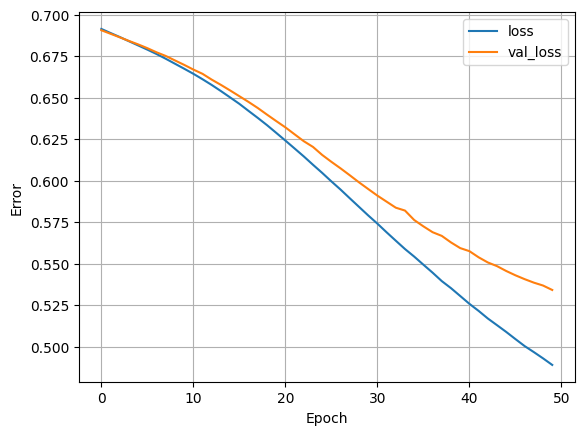

In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([100,200])
#   plt.xlim([100,200])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history_dnn)
# Your code here

In [29]:
test_predictions_unreal = model.predict(test_dataset)
real = np.argmax(test_predictions_unreal,axis=1)
check=[]
tpv=0
fpv=0
tnv=0
fnv=0
test_dataset_labels_array = test_dataset_labels.to_numpy()
test_dataset_labels_array=[int(i) for i in test_dataset_labels_array]


for i in range(len(test_dataset_labels_array)):
    if test_dataset_labels_array[i]==1 and real[i]==0:
        fnv+=1
    elif test_dataset_labels_array[i]==0 and real[i]==1:
        fpv+=1
    elif test_dataset_labels_array[i]==0 and real[i]==0:
        tnv+=1
    elif test_dataset_labels_array[i]==1 and real[i]==1:
        tpv+=1

metrics = {"True Positive":[tpv],"True Negative":[tnv],"False Positive":[fpv],"False Negative":[fnv]}
metrics
metrics_df = pd.DataFrame(metrics)
metrics_df
accuracy = (tpv+tnv)/20
print(metrics_df)
accuracy

63/63 [==============================] - 1s 8ms/step
   True Positive  True Negative  False Positive  False Negative
0            612            834             162             392


72.3